## Beta distribution

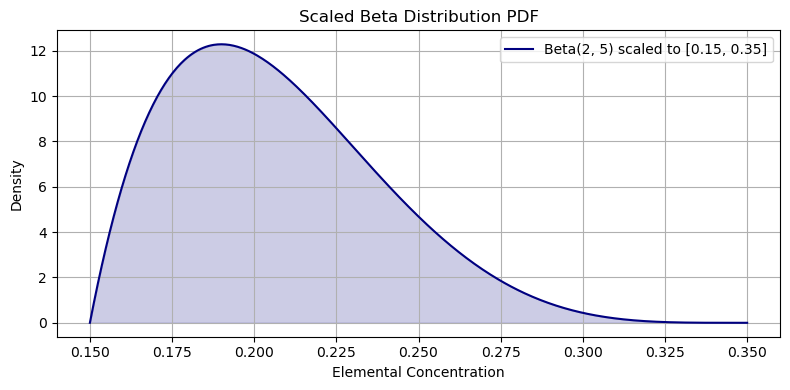

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the interval over which to scale the distribution
x_min, x_max = 0.15, 0.35

# Define shape parameters for the original Beta distribution
alpha, beta_param = 2, 5

# Generate x values within the target support
x = np.linspace(x_min, x_max, 500)

# Scale and shift the standard Beta PDF to the new interval
scaled_pdf = beta.pdf((x - x_min) / (x_max - x_min), a=alpha, b=beta_param) / (x_max - x_min)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(x, scaled_pdf, label=f'Beta({alpha}, {beta_param}) scaled to [{x_min}, {x_max}]', color='navy')
plt.fill_between(x, scaled_pdf, alpha=0.2, color='navy')
plt.title('Scaled Beta Distribution PDF')
plt.xlabel('Elemental Concentration')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Gaussian distribution

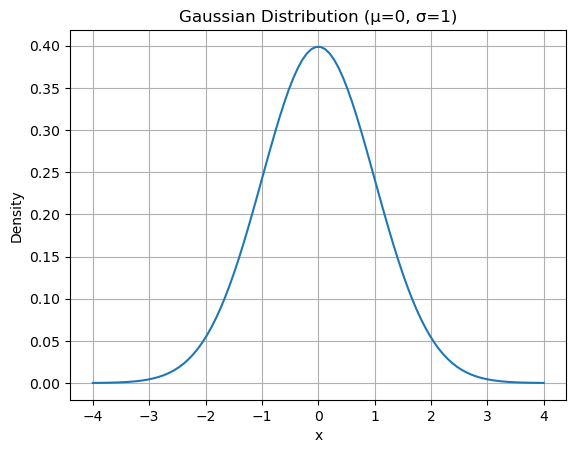

In [7]:
import numpy as np
import matplotlib.pyplot as plt

mu = 0      # mean
sigma = 1   # standard deviation

x = np.linspace(-4, 4, 100)
y = (1/(np.sqrt(2*np.pi*sigma**2))) * np.exp(- (x - mu)**2 / (2*sigma**2))

plt.plot(x, y)
plt.title("Gaussian Distribution (μ=0, σ=1)")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.show()


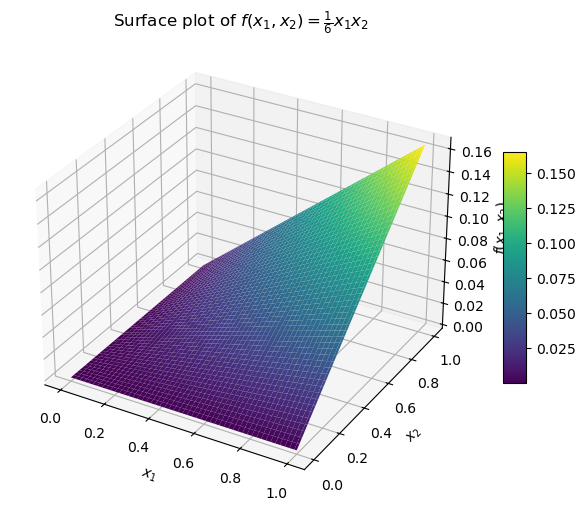

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(x1, x2):
    return (1/6) * x1 * x2

# Create grid points
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate function values
Z = f(X1, X2)

# Plotting
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none')

# Labels and title
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
ax.set_title('Surface plot of $f(x_1, x_2) = \\frac{1}{6} x_1 x_2$')

# Color bar
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()


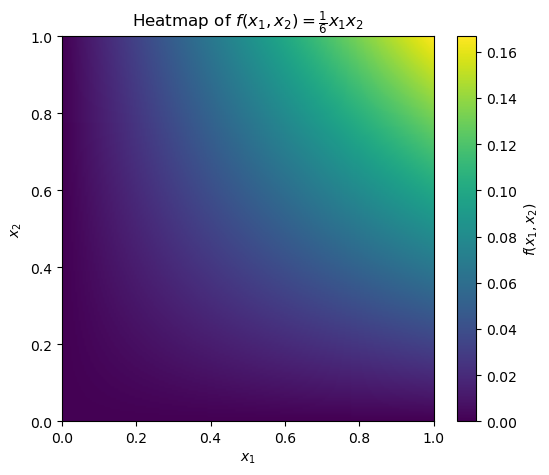

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x1, x2):
    return (1/6) * x1 * x2

# Create grid points
x1 = np.linspace(0, 1, 200)
x2 = np.linspace(0, 1, 200)
X1, X2 = np.meshgrid(x1, x2)

# Calculate function values
Z = f(X1, X2)

# Plot heatmap
plt.figure(figsize=(6,5))
heatmap = plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower', cmap='viridis', aspect='auto')

# Add colorbar
plt.colorbar(heatmap, label='$f(x_1, x_2)$')

# Labels and title
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Heatmap of $f(x_1, x_2) = \\frac{1}{6} x_1 x_2$')

plt.show()


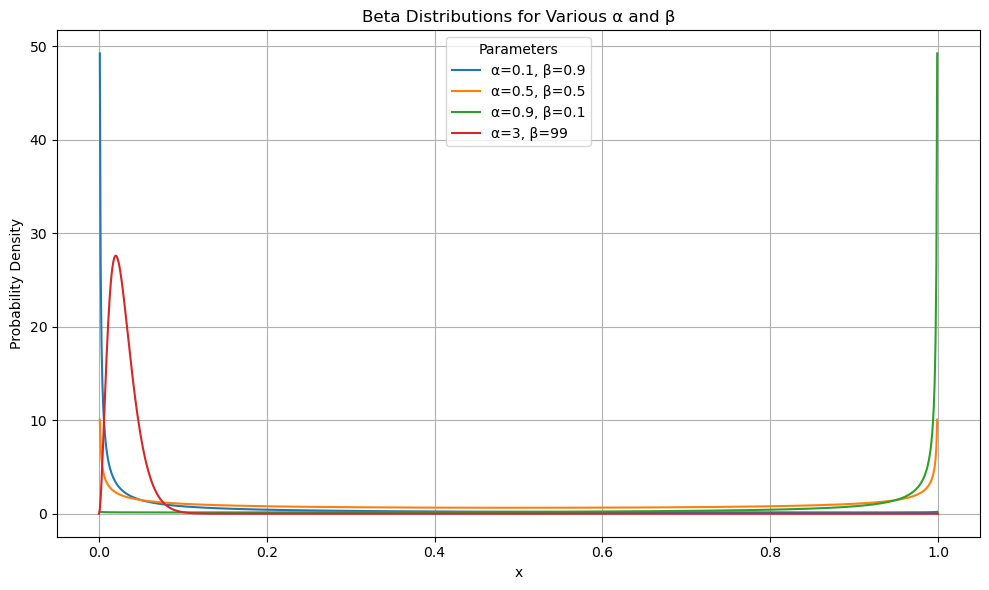

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define range for x (support of the Beta distribution)
x = np.linspace(0, 1, 1000)

# List of (alpha, beta) pairs to illustrate
# params = [
#     (0.5, 0.5),
#     (0.7, 0.3),
#     (0.2, 0.8),
#     (0.6, 0.4),
#     (0.1, 0.9),
#     ]

params = [
    (0.1, 0.9),
    (0.5,0.5),
    (0.9,0.1),
    (3,99)

    ]

# Plotting
plt.figure(figsize=(10, 6))
for a, b in params:
    y = beta.pdf(x, a, b)
    plt.plot(x, y, label=f'α={a}, β={b}')

plt.title('Beta Distributions for Various α and β')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend(title='Parameters')
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
import numpy as np
from scipy.optimize import minimize_scalar

def dirichlet_alphas_from_moments(mu, sigma2, tol=1e-8):
    """
    Given arrays mu (length K) and sigma2 (length K) returns:
      - alphas: fitted Dirichlet alpha_i (length K)
      - alpha0: fitted total concentration
      - exact: True if exact matching was possible (within tol)
    """
    mu = np.asarray(mu, dtype=float)
    sigma2 = np.asarray(sigma2, dtype=float)
    if mu.shape != sigma2.shape:
        raise ValueError("mu and sigma2 must have same shape")

    # candidate alpha0s from each component (may disagree)
    cand = mu * (1 - mu) / sigma2 - 1.0

    # Check positivity
    if np.any(cand <= 0):
        # components with nonpositive candidate indicate infeasible exact solution
        exact = False
    else:
        # check if all candidate values are nearly equal
        if np.allclose(cand, cand[0], atol=tol, rtol=0):
            alpha0 = float(np.mean(cand))  # consistent
            alphas = mu * alpha0
            return alphas, alpha0, True
        exact = False

    # If not exact, find alpha0 > 0 minimizing SSE between implied and target variances
    def sse(alpha0):
        if alpha0 <= 0:
            return 1e300
        implied = mu * (1 - mu) / (alpha0 + 1.0)
        return float(np.sum((implied - sigma2) ** 2))

    res = minimize_scalar(sse, bounds=(1e-8, 1e8), method='bounded')
    alpha0 = float(res.x)
    alphas = mu * alpha0
    return alphas, alpha0, False

# Example usage:
mu = [0.2, 0.5, 0.3]
sigma2 = [0.01, 0.02, 0.012]
alphas, alpha0, exact = dirichlet_alphas_from_moments(mu, sigma2)
print("alphas =", alphas)
print("alpha0 =", alpha0)
print("exact match?", exact)


alphas = [2.69912279 6.74780699 4.04868419]
alpha0 = 13.495613973501946
exact match? False


alpha0 = 20.56606856830961
alphas = [ 4.11321371 10.28303428  6.16982057]
Exact match possible?: False


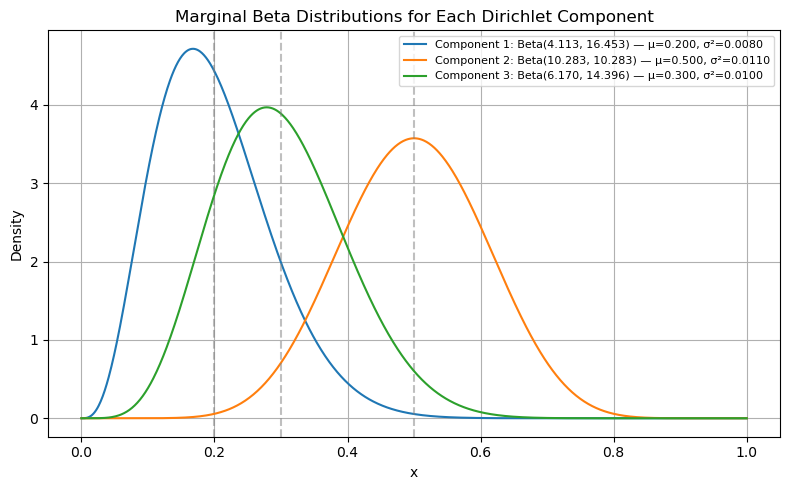

Target variances: [0.008 0.011 0.01 ]
Implied variances: [0.00741906 0.01159228 0.00973752]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.optimize import minimize_scalar
from math import isfinite

def dirichlet_alphas_from_moments(mu, sigma2, tol=1e-8):
    """
    Given arrays mu (length K) and sigma2 (length K) returns:
      - alphas: fitted Dirichlet alpha_i (length K)
      - alpha0: fitted total concentration
      - exact: True if exact matching was possible (within tol)
    """
    mu = np.asarray(mu, dtype=float)
    sigma2 = np.asarray(sigma2, dtype=float)
    if mu.shape != sigma2.shape:
        raise ValueError("mu and sigma2 must have same shape")

    # Candidate alpha0 from each component
    cand = mu * (1 - mu) / sigma2 - 1.0

    # Check exact consistency
    if np.all(cand > 0) and np.allclose(cand, cand[0], atol=tol, rtol=0):
        alpha0 = float(np.mean(cand))
        alphas = mu * alpha0
        return alphas, alpha0, True

    # Otherwise, numerical best fit (minimize SSE)
    def sse(alpha0):
        if alpha0 <= 0 or not isfinite(alpha0):
            return 1e300
        implied = mu * (1 - mu) / (alpha0 + 1.0)
        return float(np.sum((implied - sigma2) ** 2))

    res = minimize_scalar(sse, bounds=(1e-8, 1e8), method='bounded')
    alpha0 = float(res.x)
    alphas = mu * alpha0
    return alphas, alpha0, False

# Example usage
mu = np.array([0.2, 0.5, 0.3])
sigma2 = np.array([0.008, 0.011, 0.010000])

alphas, alpha0, exact = dirichlet_alphas_from_moments(mu, sigma2)
print("alpha0 =", alpha0)
print("alphas =", alphas)
print("Exact match possible?:", exact)

# Prepare x-axis for plotting
x = np.linspace(0, 1, 1000)

# Plot each marginal Beta distribution
plt.figure(figsize=(8, 5))
for i, (a_i, mu_i, sigma2_i) in enumerate(zip(alphas, mu, sigma2), start=1):
    b_i = alpha0 - a_i
    if a_i <= 0 or b_i <= 0:
        print(f"Skipping component {i}: invalid Beta parameters a={a_i:.4g}, b={b_i:.4g}")
        continue
    y = beta.pdf(x, a_i, b_i)
    plt.plot(x, y, label=f'Component {i}: Beta({a_i:.3f}, {b_i:.3f}) — μ={mu_i:.3f}, σ²={sigma2_i:.4f}')
    plt.axvline(mu_i, color='gray', linestyle='--', alpha=0.5)  # Show mean

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Marginal Beta Distributions for Each Dirichlet Component')
plt.legend(loc='upper right', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print implied variances for verification
implied_var = mu * (1 - mu) / (alpha0 + 1.0)
print("Target variances:", sigma2)
print("Implied variances:", implied_var)
